In [37]:
import pandas as pd
import math

file_name_class_HOH = "results_HOH_class.txt"
file_name_regr_HOH = "results_HOH_regr.txt"
file_name_class_NO_HOH = "results_NO_HOH_class.txt"
file_name_regr_NO_HOH = "results_NO_HOH_regr.txt"

results_class_HOH = pd.read_csv(file_name_class_HOH, sep=";")
results_regr_HOH = pd.read_csv(file_name_regr_HOH, sep=";")
results_class_NO_HOH = pd.read_csv(file_name_class_NO_HOH, sep=";")
results_regr_NO_HOH = pd.read_csv(file_name_regr_NO_HOH, sep=";")


results_regr_HOH["PRED"] = results_regr_HOH["PRED"].apply(math.exp)
results_regr_NO_HOH["PRED"] = results_regr_NO_HOH["PRED"].apply(math.exp)
        
print(results_class_HOH)
print(results_regr_HOH)
print(results_class_NO_HOH)
print(results_regr_NO_HOH)

                NAME      PRED
0       6VXX_9797919  0.170964
1          6VSB_5749  0.103019
2       6VXX_5288784  0.881401
3       6VSB_5288795  0.000005
4         6VXX_36910  0.467432
...              ...       ...
33391   6VXX_5289374  0.000000
33392    6VXX_763808  0.473344
33393  6VSB_12000797  0.028018
33394      6M71_4238  0.156461
33395      6VSB_7950  0.255449

[33396 rows x 2 columns]
                NAME           PRED
0       6VXX_9797919  365310.881432
1          6VSB_5749  818506.813392
2       6VXX_5288784       9.076832
3       6VSB_5288795  407754.680800
4         6VXX_36910  917224.003469
...              ...            ...
33391   6VXX_5289374   12920.571369
33392    6VXX_763808  320220.788205
33393  6VSB_12000797  900251.096945
33394      6M71_4238    2385.442689
33395      6VSB_7950    7476.522078

[33396 rows x 2 columns]
                NAME      PRED
0          6LU7_1051  0.282612
1         6LU7_91443  0.985706
2          6LU7_6274  0.988602
3         6LU7_34755

In [13]:
results_class_NO_HOH['protein'] = results_class_NO_HOH.NAME.apply(lambda x: x.split('_')[0])
results_class_NO_HOH['ligand'] = results_class_NO_HOH.NAME.apply(lambda x: x.split('_')[1])

results_regr_NO_HOH['protein'] = results_regr_NO_HOH.NAME.apply(lambda x: x.split('_')[0])
results_regr_NO_HOH['ligand'] = results_regr_NO_HOH.NAME.apply(lambda x: x.split('_')[1])

In [15]:
results_regr_NO_HOH = results_regr_NO_HOH.rename(columns={'PRED' : 'affinity'})
results_class_NO_HOH = results_class_NO_HOH.rename(columns={'PRED' : 'score'})
results = results_regr_NO_HOH[['protein', 'ligand', 'affinity']].merge(results_class_NO_HOH[['protein', 'ligand', 'score']], on=['protein', 'ligand'], how='left')

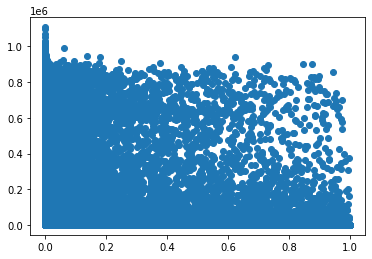

In [3]:
import matplotlib.pyplot as plt
plt.scatter(results_class_NO_HOH.PRED, results_regr_NO_HOH.PRED) 

In [8]:
results_class_NO_HOH

,NAME,PRED,protein,ligand
0,6LU7_1051,0.282612,6LU7,1051
1,6LU7_91443,0.985706,6LU7,91443
2,6LU7_6274,0.988602,6LU7,6274
3,6LU7_34755,0.935613,6LU7,34755
4,6LU7_1060,0.386867,6LU7,1060
...,...,...,...,...
33390,6M71_10176265,0.600445,6M71,10176265
33391,6M71_175,0.704198,6M71,175
33392,6M71_441336,0.339325,6M71,441336
33393,6M71_961,0.620214,6M71,961


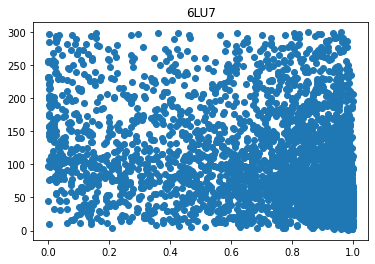

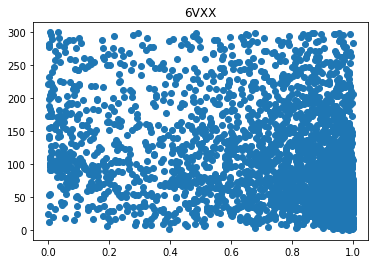

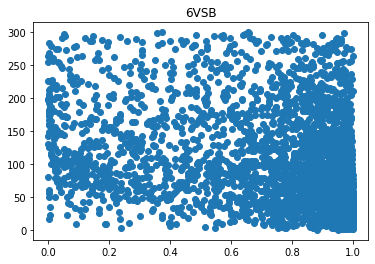

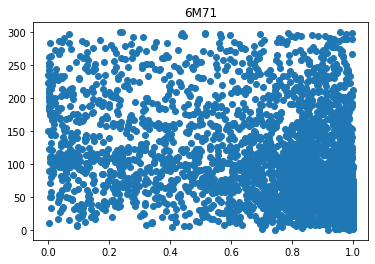

In [22]:
protein_list = results_class_NO_HOH.protein.unique()

for prot in protein_list:
    plt.scatter(results[(results.protein == prot)&(results.affinity < 300)].score, results[(results.protein == prot)&(results.affinity < 300)].affinity) 
    plt.title(prot)
    plt.show()

<AxesSubplot:>

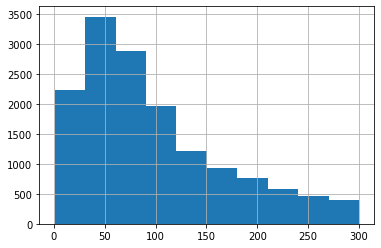

In [20]:
results_regr_NO_HOH[results_regr_NO_HOH.affinity < 300].affinity.hist()

In [2]:
bool_pred_HOH = [int(i >= 0.91) for i in list(results_class_HOH["PRED"])]
bool_pred_NO_HOH = [int(i >= 0.91) for i in list(results_class_NO_HOH["PRED"])]

print("TRUE PERCENT:")
print(sum(bool_pred_HOH)/len(bool_pred_HOH))
print(sum(bool_pred_NO_HOH)/len(bool_pred_NO_HOH))

TRUE PERCENT:
0.10423404000479099
0.22590208114987273


In [3]:
bool_pred_HOH = [int(i <= 50) for i in list(results_regr_HOH["PRED"])]
bool_pred_NO_HOH = [int(i <= 50) for i in list(results_regr_NO_HOH["PRED"])]

print("TRUE PERCENT:")
print(sum(bool_pred_HOH)/len(bool_pred_HOH))
print(sum(bool_pred_NO_HOH)/len(bool_pred_NO_HOH))

TRUE PERCENT:
0.13468678883698645
0.1326545890103309


In [4]:
results_class_HOH = results_class_HOH.sort_values(by="PRED", ascending=False)
print("TOP 25 CLASSIFICATION HOH:")
print(results_class_HOH[:25])

TOP 25 CLASSIFICATION HOH:
                NAME      PRED
30464     6M71_33675  1.000000
21319   6VXX_5288615  1.000000
31605   6VXX_6914621  1.000000
2823       6VXX_4369  1.000000
7781     6VSB_445018  1.000000
4025       6M71_4368  1.000000
9060    6M71_5289389  1.000000
31836      6VXX_2120  1.000000
78         6VXX_5111  1.000000
3671    6M71_5288615  1.000000
13810      6M71_4369  1.000000
16451   6VSB_6914621  1.000000
29723  6VXX_16129579  1.000000
28975  6VXX_16117309  1.000000
22268  6VXX_11749858  1.000000
906        6VXX_4848  1.000000
15881   6VXX_6102708  1.000000
19382   6VXX_3342298  1.000000
20832      6VSB_5111  1.000000
5929   6M71_24768528  1.000000
30343    6VSB_466151  1.000000
21928   6M71_3342298  1.000000
22511    6VXX_179337  1.000000
6591   6VXX_11291932  0.999999
31903      6M71_5111  0.999999


In [9]:
results_class_NO_HOH = results_class_NO_HOH.sort_values(by="PRED", ascending=False)
print("TOP 25 CLASSIFICATION NO HOH:")
print(results_class_NO_HOH[:25])

TOP 25 CLASSIFICATION NO HOH:
               NAME      PRED
20850   6VSB_206044  0.999999
4153    6LU7_206044  0.999999
29199   6M71_206044  0.999998
12502   6VXX_206044  0.999997
23160    6VSB_10913  0.999996
6463     6LU7_10913  0.999994
31509    6M71_10913  0.999993
14812    6VXX_10913  0.999991
11126   6VXX_449124  0.999986
27823   6M71_449124  0.999982
24039  6VSB_9888484  0.999982
28842   6M71_154000  0.999982
3796    6LU7_154000  0.999974
15691  6VXX_9888484  0.999972
25026  6VSB_5464097  0.999971
29637  6M71_6914621  0.999966
17214  6VSB_5362119  0.999965
30356  6M71_5288615  0.999960
30423     6M71_3815  0.999958
20493   6VSB_154000  0.999952
18558   6VSB_447522  0.999949
21288  6VSB_6914621  0.999947
7342   6LU7_9888484  0.999940
26907   6M71_447522  0.999938
9005    6VXX_656629  0.999935


In [6]:
results_regr_HOH = results_regr_HOH.sort_values(by="PRED", ascending=True)
print("TOP 25 REGRESSION HOH:")
print(results_regr_HOH[:25])

TOP 25 REGRESSION HOH:
                 NAME      PRED
26097      6VSB_36294  0.031975
24421       6VSB_6032  0.034128
16479    6VSB_3037209  0.045046
10392     6VXX_446724  0.055385
29950       6VSB_6131  0.058564
33170     6VXX_440483  0.060164
22445      6LU7_68682  0.070776
7501        6LU7_9444  0.077661
26639     6VSB_657041  0.080403
29501     6VXX_439318  0.081639
25067       6LU7_6032  0.084980
30992    6VSB_5289086  0.085724
30872     6VXX_447657  0.117607
24025      6VXX_68682  0.119587
32344  6M71_129856752  0.119924
17938     6VXX_448726  0.141589
16182      6M71_31264  0.149456
15059      6VSB_65309  0.171162
10507      6VXX_60855  0.175056
21191      6M71_65309  0.176845
12690     6M71_445534  0.178723
18039      6VXX_72392  0.181849
16980      6VSB_68682  0.183409
4055     6VXX_5288994  0.185591
26988   6VSB_12803287  0.186071


In [7]:
results_regr_NO_HOH = results_regr_NO_HOH.sort_values(by="PRED", ascending=True)
print("TOP 25 REGRESSION NO HOH:")
print(results_regr_NO_HOH[:25])

TOP 25 REGRESSION NO HOH:
                NAME      PRED
17264    6VSB_119031  0.692481
8916     6VXX_119031  0.729945
22867  6VSB_20055267  0.787674
25047     6M71_91443  0.833199
4023     6LU7_130731  0.888012
10789    6VXX_447271  1.055850
25613    6M71_119031  1.184784
28424    6M71_119055  1.284245
8350      6VXX_91443  1.545305
20507   6VSB_9831652  1.631738
3810    6LU7_9831652  1.666033
1528      6LU7_98792  1.677029
29361   6M71_3037981  1.690422
216       6LU7_44257  1.698163
20720    6VSB_130731  1.703516
14519  6VXX_20055267  1.710270
23832    6VSB_447268  1.933415
21012   6VSB_3037981  2.005775
23077      6VSB_5611  2.106167
27024   6M71_5288251  2.170672
21646   6VSB_6323250  2.192747
23815  6VSB_11376392  2.254511
27005    6M71_656989  2.280820
1959     6LU7_656989  2.281667
11745     6VXX_65074  2.302720


In [26]:
# Buscamos saquinavir
results_regr_NO_HOH[results_regr_NO_HOH.NAME == '6LU7_1549008']

,NAME,affinity,protein,ligand
630,6LU7_1549008,112.568801,6LU7,1549008


In [27]:
results_class_NO_HOH[results_class_NO_HOH.NAME == '6LU7_1549008']

,NAME,score,protein,ligand
630,6LU7_1549008,0.861139,6LU7,1549008


In [36]:
remdisivir = '121304016'
results_class_NO_HOH[results_class_NO_HOH.NAME == '6M71_121304016']

,NAME,score,protein,ligand


NAME         object
affinity    float64
protein      object
ligand       object
dtype: object

In [8]:
top = 1000

print("MATCHING RESULTS IN THE TOP " + str(top) + " HOH:")

list_results_class_HOH = list(results_class_HOH[:top]["NAME"])
list_results_regr_HOH = list(results_regr_HOH[:top]["NAME"])

for i in list_results_regr_HOH:
    if i in list_results_class_HOH:
        print(i)

MATCHING RESULTS IN THE TOP 1000 HOH:
6VSB_20055267
6VSB_3037981
6VXX_3037981
6VXX_443600
6M71_3037981
6M71_176873
6M71_20055267
6VSB_176873
6VSB_9543420
6VXX_20055267
6LU7_20055267
6VXX_449123
6VSB_466151
6VXX_449124
6VSB_449123
6VXX_176873
6VSB_160024
6VXX_466151
6M71_449124
6VSB_11143173
6VXX_10379137
6M71_123982
6VSB_123982
6VSB_5362422
6VXX_5362422
6M71_135548
6M71_9543420
6VXX_9543420
6VSB_17754173
6VSB_15547703
6M71_5464096
6VSB_10379137
6M71_11143173
6M71_656629
6VSB_446504
6M71_42609673
6VXX_5288615
6M71_5288032
6M71_5288615
6VXX_5287415
6M71_17754173
6VXX_443289


In [17]:
results_class_NO_HOH[results_class_NO_HOH.NAME.str.contains('6LU7_45375808')]

,NAME,PRED
6119,6LU7_45375808,0.818495
